In [1]:
import numpy as np
import math

def Av(v):
    return A@v

def conjGrad(Av,x,b,tol=1.0e-9):
    n = len(b)
    r = b - Av(x)
    s = r.copy()
    for i in range(n):
        u = Av(s)
        alpha = np.dot(s,r)/np.dot(s,u)
        x = x + alpha*s
        r = b - Av(x)
        if(math.sqrt(np.dot(r,r))) < tol:
            break 
        else:
            beta = -np.dot(r,u)/np.dot(s,u)
            s = r + beta*s
    return x,i

def gaussElimin(a,b):
    n = len(b)
    # Elimination Phase
    for k in range(0, n-1):
        for i in range(k+1, n):
            if a[i, k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i, k+1:n] = a[i, k+1:n] - lam * a[k, k+1:n]
                b[i] = b[i] - lam * b[k]

    # Back substitution
    for k in range(n-1, -1, -1):
        b[k] = (b[k] - np.dot(a[k,k+1:n], b[k+1:n]))/a[k,k]
    
    return b

![img](./p1.png)

In [2]:
import numpy as np
import math

k = 2.5
W = 1
A = np.diag([2,4,4,2,3]) - np.eye(5,k=-1) - np.eye(5,k=1) + np.diag([0,0,-2],k=2) + np.diag([0,0,-2],k=-2)
b = W/k*np.ones(5)
x = np.zeros(5)

print('Conjugate graduate method :',conjGrad(Av,x,b)[0])
print('np.linalg.solve           :',np.linalg.solve(A,b))

Conjugate graduate method : [0.56 0.72 1.92 2.24 2.16]
np.linalg.solve           : [0.56 0.72 1.92 2.24 2.16]


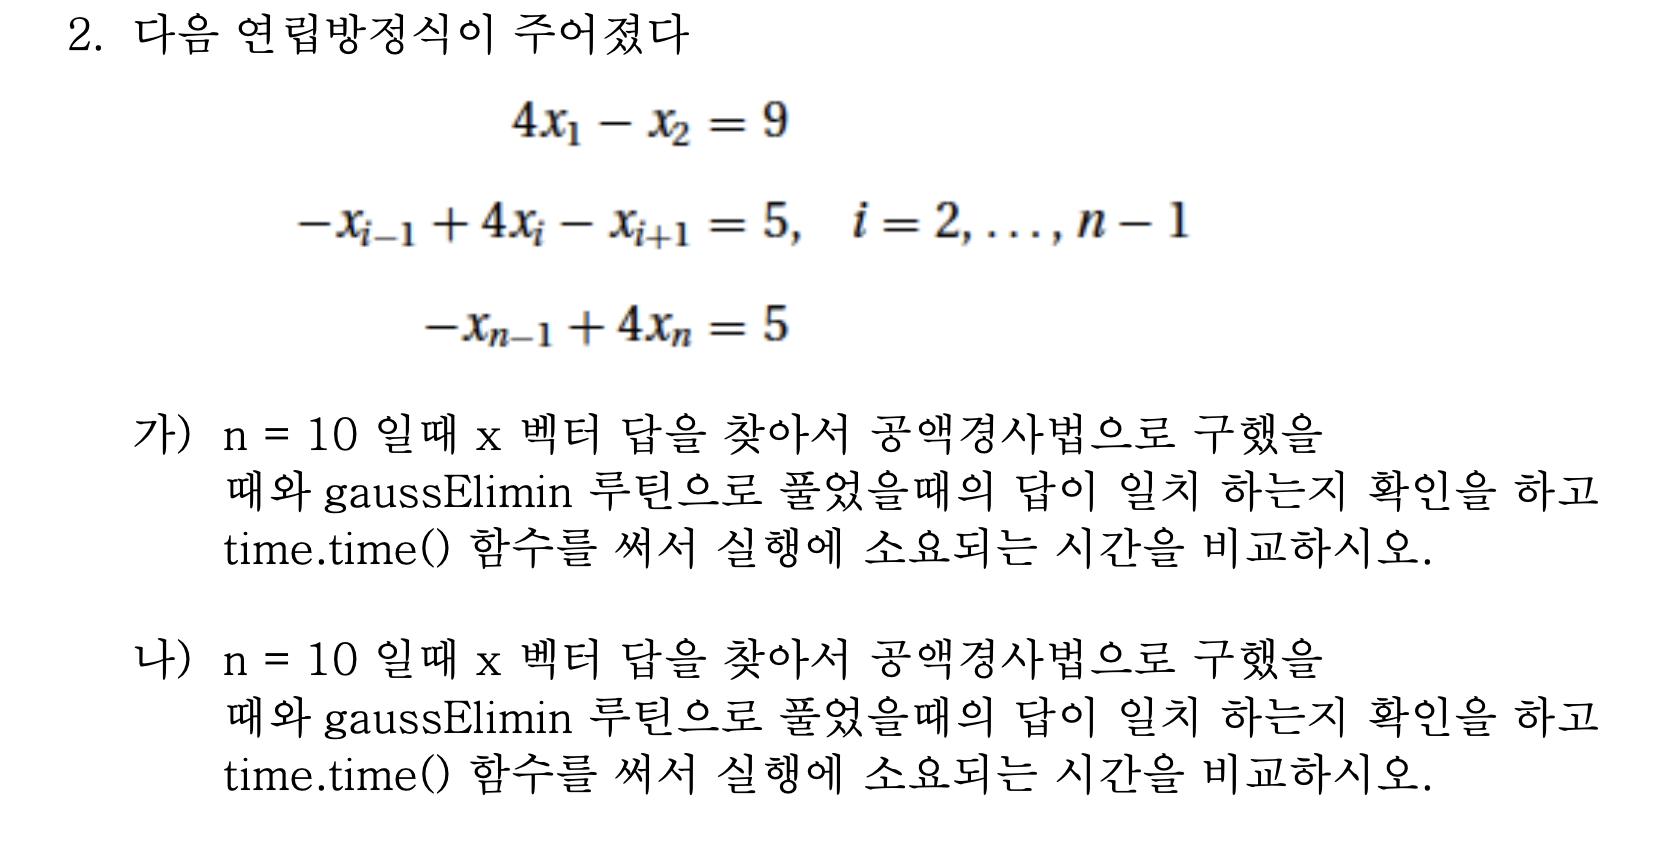

In [3]:
import numpy as np
import math
from time import time

n = 10
u = -np.ones(n-1)
c = 4*np.ones(n)
d = -np.ones(n-1)

A = np.diag(u,k=1) + np.diag(c) + np.diag(d,k=-1) 
b = 5*np.ones(n)
b[0] = 9
x = np.zeros(n)

t0 = time()
cG = conjGrad(Av,x,b)
t1 = time()
print('Conjugate Gradient Solution ->\n',cG[0])
print('Conjugate Gradient Solution Time :',t1-t0)
t0p = time()
gE = gaussElimin(A,b)
t1p = time()
print('\nGauss Elimination Solution  ->\n',gE)
print('Gauss Elimination Solution Time  :',t1p-t0p)
print('\nConjugate Gradient Solution Time / Gauss Elimination Solution Time : ',(t1-t0)/(t1p-t0p))

Conjugate Gradient Solution ->
 [2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]
Conjugate Gradient Solution Time : 0.0008249282836914062

Gauss Elimination Solution  ->
 [2.90191936 2.60767745 2.52879042 2.50748425 2.50114659 2.4971021
 2.48726181 2.45194513 2.3205187  1.83012968]
Gauss Elimination Solution Time  : 0.0012679100036621094

Conjugate Gradient Solution Time / Gauss Elimination Solution Time :  0.6506205340353516


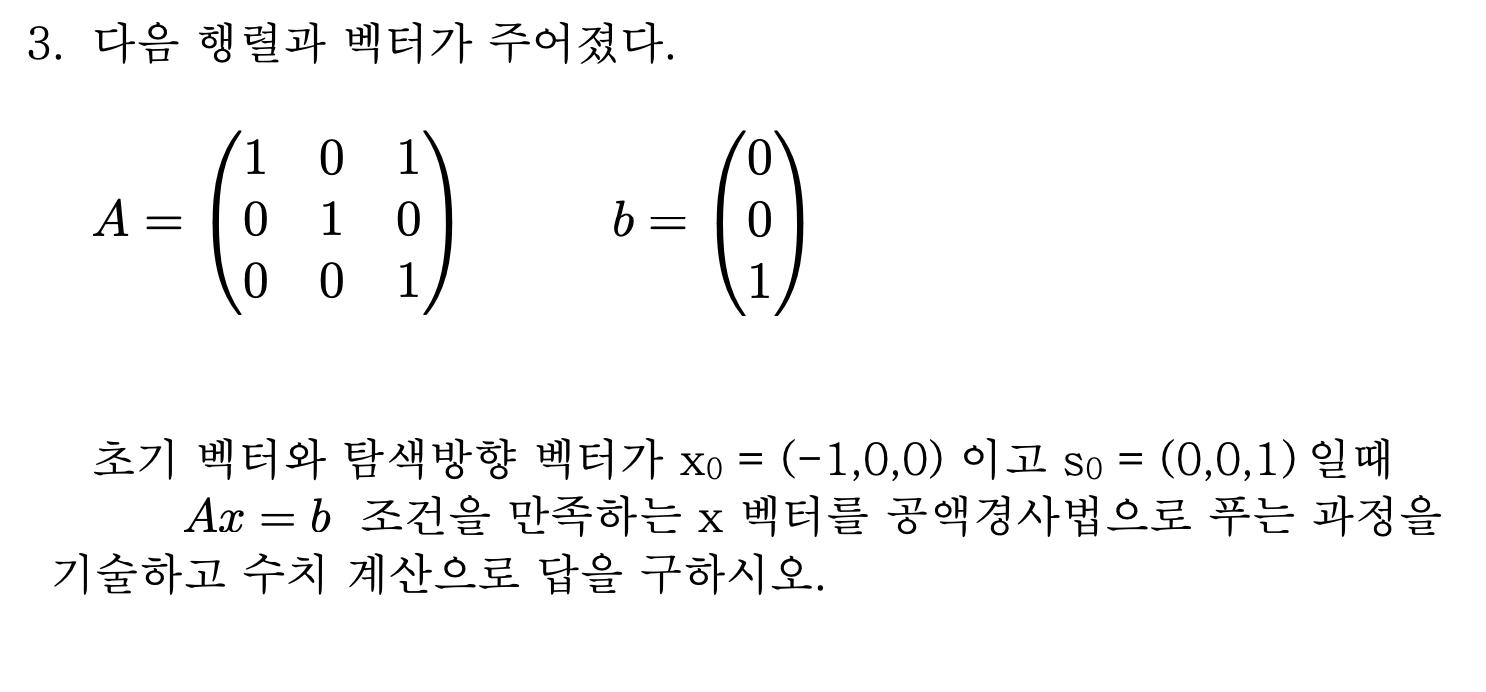

In [4]:
import numpy as np

A = np.array([[1,0,1],[0,1,0],[0,0,1]],dtype=float)
b = np.array([0,0,1],dtype=float)
x = np.array([-1,0,0])

x0 = x.copy()
# First iteration

r0 = b - A@x0    # Residual, 차이
s0 = np.array([0,0,1])   # search direction, 탐색 방향 벡터
a0 = s0@r0 / (s0@A@s0)    # Scaling factor

# Update x
x1 = x0 + a0*s0
print('Check A@x1 :',A@x1)
print('Satisfy A@x1 == b -> x = x1')
print('x :',x1)

Check A@x1 : [0. 0. 1.]
Satisfy A@x1 == b -> x = x1
x : [-1.  0.  1.]
